[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/osllmai/indoxGen/blob/master/examples/gan_tensorflow.ipynb)

In [1]:
from indoxGen_tensor import TabularGANConfig,TabularGANTrainer

In [2]:
import pandas as pd
data = pd.read_csv("data/Adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [4]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [5]:
# Set up the configuration
config = TabularGANConfig(
    input_dim=200,  # Noise dimension
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=50,
    n_critic=5
)

# Initialize the trainer with the config and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the model
history = trainer.train(data, patience=15)


Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 45s 42ms/step - d_loss: 1.1958 - g_loss: -0.5724 - learning_rate: 0.0010
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - d_loss: -2.0201 - g_loss: 0.3521 - learning_rate: 0.0010
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - d_loss: -1.2178 - g_loss: 0.6071 - learning_rate: 0.0010
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - d_loss: -0.6275 - g_loss: 0.6624 - learning_rate: 0.0010
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - d_loss: -0.6053 - g_loss: 1.3396 - learning_rate: 0.0010
Epoch 6/50
381/382 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - d_loss: -0.6635 - g_loss: 1.8165
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
382/382 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - d_loss: -0.6647 - g_loss: 1.8178 - learning_rate: 0.0010
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - d_loss: -0.7068 - g_loss: 2.2287 - learning_rate: 5.0000e-04
Epoch 8/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/ste

In [7]:
# generate synthetic data
synthetic_data = trainer.generate_samples(50000)

In [8]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,4,84521,9,2,12,0,4,1,2082,0,41,39,1
1,25,4,127011,11,4,4,4,2,0,0,0,29,39,0
2,29,4,228877,9,2,12,0,4,1,0,0,36,39,1
3,52,4,191142,9,2,12,0,4,1,0,6,40,39,0
4,52,4,193560,11,2,8,0,4,1,89,43,31,39,0


In [9]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [10]:
data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.239282
std,13.710510,1.464234,1.056040e+05,3.874492,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [11]:
synthetic_data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,37.563320,4.139080,184533.300780,11.326040,2.448920,6.196200,1.225680,3.846860,0.689620,792.825060,53.970740,40.734120,38.363160,0.251880
std,11.469453,0.913145,84022.492067,2.382379,1.410543,3.889896,1.456101,0.537042,0.462654,1782.926919,126.155977,8.486056,3.749458,0.434097
min,25.000000,0.000000,84061.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,25.000000,4.000000,95955.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,32.000000,39.000000,0.000000
50%,35.000000,4.000000,173147.000000,11.000000,2.000000,8.000000,1.000000,4.000000,1.000000,73.000000,4.000000,42.000000,39.000000,0.000000
75%,51.000000,4.000000,279872.250000,11.000000,4.000000,8.000000,3.000000,4.000000,1.000000,515.000000,24.000000,49.000000,39.000000,1.000000
max,52.000000,7.000000,295267.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,8531.000000,491.000000,53.000000,39.000000,1.000000


In [12]:
history = trainer.get_training_history()

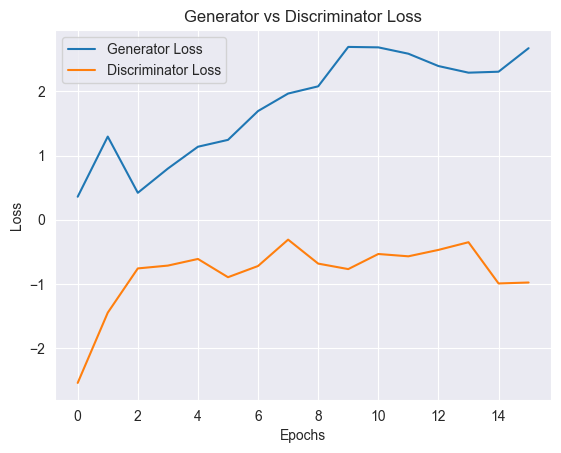

In [13]:
import matplotlib.pyplot as plt

# Extract loss history from the training process
generator_loss = history.history['g_loss']
discriminator_loss = history.history['d_loss']

# Plot the loss curves
plt.plot(generator_loss, label='Generator Loss')
plt.plot(discriminator_loss, label='Discriminator Loss')
plt.title('Generator vs Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


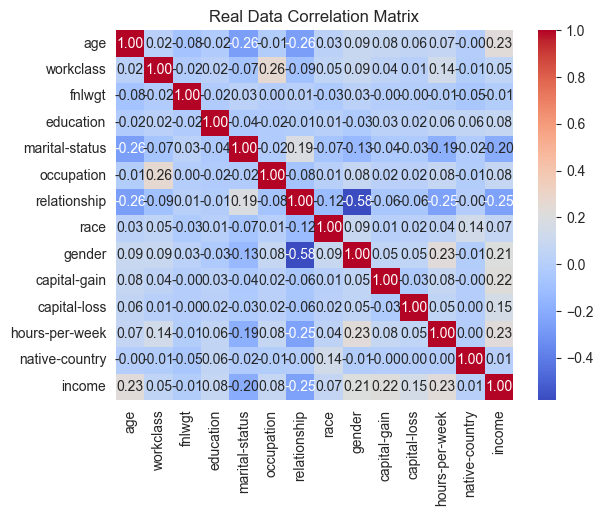

<Axes: >

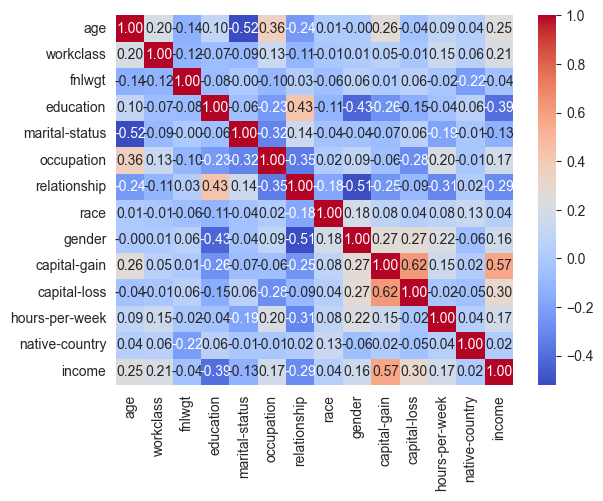

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and round correlation matrices to 2 decimal places
real_corr = data.corr().round(2)
synthetic_corr = synthetic_data.corr().round(2)

# Plot heatmap for real data
sns.heatmap(real_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2f' ensures 2 decimal places
plt.title('Real Data Correlation Matrix')
plt.show()

# Plot heatmap for synthetic data
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2


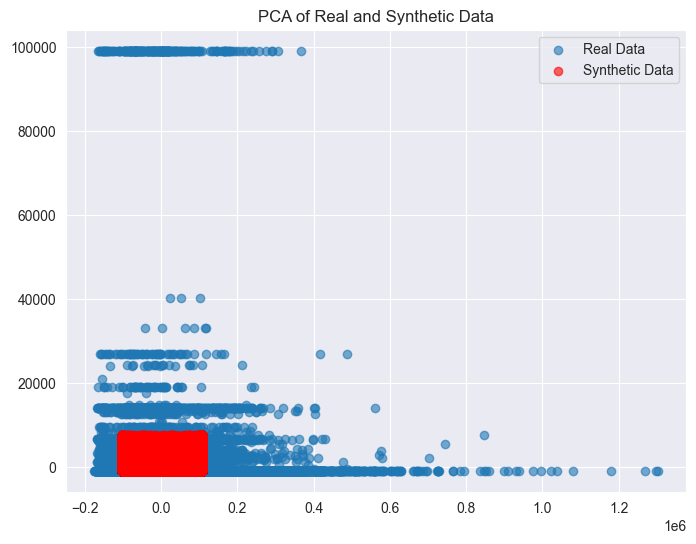

In [15]:
from sklearn.decomposition import PCA

# Combine real and synthetic data for PCA
combined_data = pd.concat([data, synthetic_data])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:len(data), 0], pca_result[:len(data), 1], label="Real Data", alpha=0.6)
plt.scatter(pca_result[len(data):, 0], pca_result[len(data):, 1], label="Synthetic Data", alpha=0.6, color='red')
plt.title('PCA of Real and Synthetic Data')
plt.legend()
plt.show()


In [16]:
synthetic_data["income"].value_counts()

income
0    37406
1    12594
Name: count, dtype: int64

In [17]:
data["income"].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64